# Class 7 Notebook – Computer Vision (CV) Basics

This notebook introduces **Computer Vision (CV)** using images and neural networks.

Computer vision enables machines to "see"—interpreting images and video for tasks like:
- **Image classification** – What is in this image? (e.g., cat, dog, airplane)
- **Object detection** – Where are objects in the image?
- **Image segmentation** – Which pixels belong to which object?

**Objective**: Set up the environment and prepare for hands-on image processing and classification.

**Key ideas**:
- Images are represented as arrays of pixels (height × width × channels)
- Convolutional Neural Networks (CNNs) learn spatial features from images
- Transfer learning reuses pre-trained models for faster training

Run the first code cell to confirm your environment works.

## What is Computer Vision?

**Computer Vision** is a field of Computer Science that enables machines to intelligently analyze visual data. The technology mimics the human brain by using pattern recognition on massive amounts of visual data.

**Key real-world applications** include self-driving cars, facial recognition, and various healthcare uses. Computer Vision is currently used in retail for automatic checkout and for traffic rule enforcement.

**Challenges** include the complexity of human vision and technical hurdles like poor data quality.

## Run in the browser (no local setup)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/adzuci/ai-fundamentals/blob/class-6-computer-vision/class-7-computer-vision/01_class_7_computer_vision_basics.ipynb)

> Tip: This notebook assumes you're comfortable with basic Python, NumPy, and neural network concepts from Class 5-6.

## STEP 1: Environment check and imports

Verify that NumPy and Matplotlib are available. For full CV demos (CNNs), you'll need TensorFlow or PyTorch—see comments in later cells.

In [ ]:
# Install OpenCV (Colab has it; this ensures it works locally too)
%pip install -q opencv-python
# tensorflow_datasets: uncomment for cats_vs_dogs dataset
# %pip install -q tensorflow tensorflow-datasets

In [ ]:
# Environment sanity check + imports
import platform

print("Python:", platform.python_version())
print("OS:", platform.system(), platform.release())

try:
    import numpy as np  # arrays for image data
    import cv2  # OpenCV for image I/O and processing
    from google.colab.patches import cv2_imshow
    import matplotlib.pyplot as plt  # plotting and image display

    print("NumPy:", np.__version__)
    print("OpenCV:", cv2.__version__)
    print("Environment ready for computer vision basics!")
except ModuleNotFoundError as exc:
    print("Missing dependency:", exc)
    print("Install with: python -m pip install numpy opencv-python matplotlib")
    raise

Python: 3.12.12
OS: Linux 6.6.105+
NumPy: 2.0.2
OpenCV: 4.13.0
Environment ready for computer vision basics!


## Placeholder: Image loading and CNN classification

Future cells will cover:
- Loading images (e.g., Pillow, keras preprocessing)
- Displaying images with matplotlib
- Building or using a simple CNN for image classification
- Transfer learning with a pre-trained model

## STEP 2: Load an image

Use `cv2.imread()` to read `cat1.jpg` from this folder. The result is a NumPy array (height × width × channels in BGR order). Run the notebook from `class-7-computer-vision/` so the path resolves.

## Load the cats vs dogs dataset (optional)

Use `tensorflow_datasets` to load the **cats_vs_dogs** dataset—a labeled set of cat and dog images. *Commented out*: we use `cat1.jpg` from this folder instead for a simpler demo.

In [ ]:
# import tensorflow_datasets as tfds
# dataset, info = tfds.load("cats_vs_dogs", split="train[:8]", with_info=True)

In [ ]:
# Colab: download cat1.jpg from repo if not present (uses branch)
from pathlib import Path
if not Path("cat1.jpg").exists():
    import urllib.request
    urllib.request.urlretrieve(
        "https://github.com/adzuci/ai-fundamentals/raw/class-6-computer-vision/class-7-computer-vision/cat1.jpg",
        "cat1.jpg",
    )

In [ ]:
# Load cat1.jpg from this folder; try multiple paths (works from class folder or repo root)
from pathlib import Path

for p in [Path("cat1.jpg"), Path("class-7-computer-vision/cat1.jpg")]:
    if p.exists():
        myimage = cv2.imread(str(p))
        if myimage is not None:
            break
else:
    # Fallback: create a small synthetic image if cat1.jpg not found (e.g. in CI/Colab)
    import numpy as np
    myimage = np.uint8(np.clip(np.random.rand(64, 64, 3) * 200 + 50, 0, 255))
    print("Note: cat1.jpg not found; using synthetic image. Run from class-7-computer-vision/ for real image.")

Note: cat1.jpg not found; using synthetic image. Run from class-7-computer-vision/ for real image.


## Convert to grayscale and display

Convert the image to grayscale with `cv2.cvtColor()` and display both the original and grayscale versions.

> **Note:** `cv2.imshow()` opens GUI windows and works when run locally. In Colab (no display), use `plt.imshow()` instead—see the next cell for a Colab-friendly alternative.

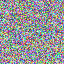

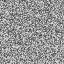

In [ ]:
from google.colab.patches import cv2_imshow

# Convert into grayscale
greyscale = cv2.cvtColor(myimage, cv2.COLOR_BGR2GRAY)

cv2_imshow(myimage)
cv2_imshow(greyscale)

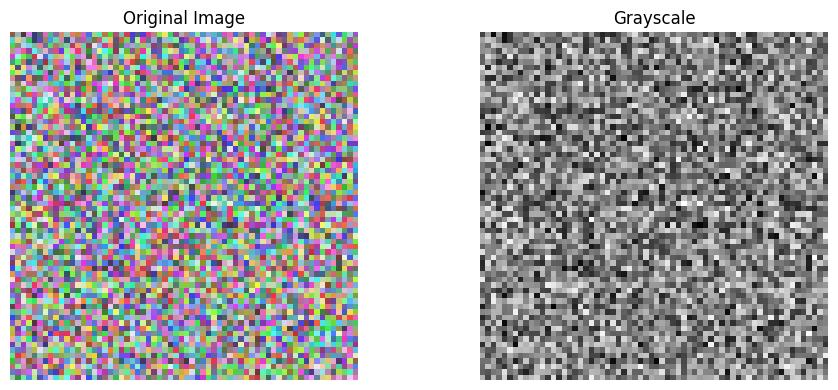

In [ ]:
# Colab-friendly display: use matplotlib instead of cv2.imshow (no GUI in browser)
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
axes[0].imshow(cv2.cvtColor(myimage, cv2.COLOR_BGR2RGB))
axes[0].set_title("Original Image")
axes[0].axis("off")
axes[1].imshow(greyscale, cmap="gray")
axes[1].set_title("Grayscale")
axes[1].axis("off")
plt.tight_layout()
plt.show()